<a href="https://colab.research.google.com/github/DidierAgamez/EduFinance_Simulator/blob/main/Proyecto_MR_EDUFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EduFinance Simulator

Para el primer analisis exploratorio de datos vamos a definir un conjunto de datos piloto de activos los cuales nos serviran como base para posteriormente poder escalar el proyecto.

Este conjunto piloto esta conformado por 3 tipos de activos (Etfs, acciones individuales y criptos)

A continuación daremos una breve descripción de cada uno de estos activos para asi poder comprender mejor cada una de las caracteristicas de cada uno de los activos que manejaremos dentro del proyecto.

##**ETF (Exchange Traded Fund)**
Es un fondo cotizado en bolsa que agrupa diversos activos financieros ( acciones, bonos o materias primas) que se puede comprar y vender durante la sesión bursátil como si fuera una acción, generalmente tienen como objetivo replicar un indice.  Basicamente es como una caja que almacena muchos activos finacieros (acciones, bonos) los cuales puedes comprar y vender.

###**ETFS que consideramos para el conjunto piloto:**

**VOO – Vanguard S&P 500 ETF**: Es ETF que busca replicar el rendimiento del S&P 500 (500 grandes compañías de EE. UU.)

* **Porque escogerla?**: Es un etf de distribución que replica al s&p 500, lo que nos puede dar una base sobre el mercado estadounidense y su comportamiento.

**QQQ – Invesco QQQ Trust (Nasdaq-100)**: ETF pasivo que sigue el Nasdaq-100 (100 compañías mas grandes no financieras listadas en Nasdaq).

* **Porque escogerla?**:Permite analizar el comportamiento de un sector de crecimiento con mayor volatilidad que el S&P 500. Su inclusión nos ayuda a comparar la dinámica de empresas tecnológicas frente al conjunto más diversificado del VOO y ver correlaciones con acciones de tipo “growth” como Tesla.

**EUNL – iShares Core MSCI World UCITS ETF (Acc)**: ETF UCITS de acumulación que replica el MSCI World (empresas de países desarrollados).

* **Porque escogerla?**:Aporta una cobertura global y, al ser acumulativo, reinvierte dividendos en el fondo. Nos permite comparar la diversificación internacional frente a ETFs concentrados en EE. UU., y analizar cómo la exposición a múltiples monedas y mercados impacta en rendimientos y volatilidad.

**XAR – SPDR S&P Aerospace & Defense ETF**: ETF que replica el índice S&P Aerospace & Defense Select Industry Index, el cual incluye compañías del sector aeroespacial y de defensa de EE. UU. A diferencia de otros fondos más concentrados en grandes empresas, XAR utiliza un método de ponderación equitativa, lo que da más representación a medianas y pequeñas compañías del sector.

* **¿Por qué escogerlo?**: Ofrece exposición diversificada al sector defensa. Presenta una tendencia más balanceada, al no depender tanto de pocas compañías grandes. Permite analizar un sector considerado defensivo, útil para comparar con ETFs amplios (VOO), tecnológicos (QQQ) y globales (EUNL).

##**Acciones**
Es una parte o "porción" del capital de una empresa. Cuando alguien compra una acción, está comprando una pequeña parte de esa empresa.

###**Acciones que consideramos para el conjunto piloto:**

**TSLA – Tesla, Inc**:Empresa estadounidense dedicada a la fabricación de vehículos eléctricos y soluciones de energía renovable. Es una de las compañías más representativas del sector tecnológico-automotriz y de alto crecimiento.

* **¿Por qué escogerlo?**: Acción con alta volatilidad y fuerte correlación con sectores de innovación. Representa un perfil de crecimiento (growth), ideal para contrastar con activos más estables. Permite analizar cómo una acción individual influye frente a índices más diversificados como QQQ o VOO.

**V – Visa Inc**: Compañía multinacional que opera una de las redes de pagos electrónicos más grandes del mundo, facilitando transacciones entre bancos, comercios y consumidores en más de 200 países.

* **¿Por qué escogerlo?**: Acción con volatilidad más baja comparada con empresas de crecimiento. Representa un sector defensivo y estable, ligado al consumo global y a servicios financieros. Permite contrastar un activo más estable frente a otro más volátil como Tesla, enriqueciendo el análisis de correlaciones.

##**Criptomonedas**

Son un tipo de dinero digital que no existe en forma física, sino solo en internet. Funcionan usando una tecnología llamada "blockchain" que asegura que las transacciones sean seguras y que nadie pueda copiar o falsificar ese dinero. No están controladas por bancos o gobiernos, por lo que son independientes y funcionan de manera descentralizada.

###**Criptomonedas que consideramos para el conjunto piloto:**

**BTC – Bitcoin**: La primera criptomoneda descentralizada, creada en 2009, basada en la tecnología blockchain y con un suministro máximo de 21 millones de unidades. Funciona sin intermediarios y es considerada una reserva digital de valor.

* **¿Por qué escogerla?**: Activo altamente volátil, ideal para contrastar con acciones y ETFs. Permite analizar el comportamiento de un mercado que opera 24/7 sin restricciones horarias. Representa el referente principal del ecosistema cripto, útil para medir correlaciones frente a mercados tradicionales.

**XRP – XRP (XRP Ledger)**: Criptomoneda nativa del XRP Ledger, una blockchain diseñada para realizar pagos rápidos y de bajo costo a nivel global. Su tiempo de liquidación es de solo segundos y las comisiones son mínimas.

* **¿Por qué escogerlo?**: Presenta un comportamiento distinto a Bitcoin, con mayor enfoque en la utilidad transaccional. Permite analizar la volatilidad de un activo cripto alternativo frente al líder (BTC). Añade diversidad al conjunto piloto, ya que refleja un uso práctico en pagos más que como reserva de valor.

#Prepatacion del entorno

In [ ]:
"""
Verificamos versión de Python y actualizamos pip
Razón: asegurar compatibilidad con las librerías a usar en esta primera fase.
"""


import sys, subprocess

print(f"Python: {sys.version}")
subprocess.run([sys.executable, "-m", "pip", "install", "--upgrade", "pip"], check=False)


Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


CompletedProcess(args=['/usr/bin/python3', '-m', 'pip', 'install', '--upgrade', 'pip'], returncode=0)

In [ ]:
"""
Instalamos librerías necesarias para:
Manipulación de datos: pandas, numpy
Visualización: matplotlib, seaborn, plotly
Fuentes de datos: yfinance (acciones/ETFs), pycoingecko (criptos)
Metadatos: pyyaml (para guardar dataset_card)
"""
pkgs = [
    "pandas", "numpy",
    "matplotlib", "seaborn", "plotly",
    "yfinance", "pycoingecko",
    "pyyaml"
]

subprocess.run([sys.executable, "-m", "pip", "install", *pkgs], check=False)

CompletedProcess(args=['/usr/bin/python3', '-m', 'pip', 'install', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'plotly', 'yfinance', 'pycoingecko', 'pyyaml'], returncode=0)

In [ ]:
"""
Importamos las librerias previamente instaladas

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import yfinance as yf
import yaml
import datetime
from typing import Tuple, Dict

print("Librerías importadas correctamente ")

Librerías importadas correctamente 


#Obtencion de datos

In [ ]:
"""
OBJETIVO:
- Descargar datos HISTÓRICOS DIARIOS de:
  • ETFs/Acciones: VOO, QQQ, EUNL (Xetra), XAR, TSLA, V
  • Criptomonedas: BTC-USD (bitcoin), XRP-USD (ripple)
- Normalizar todo a un formato "ordenado" (tidy) listo para EDA.

FUENTES:
- yfinance → para ETFs, acciones y criptos (datos de Yahoo Finance)

CONSIDERACIONES:
- Usaremos precios ajustados ('Adj Close') en ETFs y acciones
  para que incluyan dividendos y splits.
- En criptos, trabajaremos con precios de cierre diario.
- Guardaremos todos los datos en DataFrames de pandas.


Paso 1 ─ Definir universo y rango temporal
- Definimos listas de símbolos para Yahoo Finance.
- Elegimos un rango amplio (p.ej., desde 2015-01-02 hasta 2025-09-05).
"""

#Los tickers son los simbolos que la API reconoce.
# Nota: EUNL cotiza en Xetra -> ticker: "EUNL.DE"
TICKERS_YF = [
    "VOO",        # Vanguard S&P 500 ETF
    "QQQ",        # Invesco Nasdaq-100 ETF
    "EUNL.DE",    # iShares MSCI World (Xetra, EUR)
    "XAR",        # SPDR Aerospace & Defense ETF
    "TSLA",       # Tesla Inc.
    "V",          # Visa Inc.
    "BTC-USD",    # Bitcoin en USD
    "XRP-USD"     # Ripple en USD
]


# Rango temporal diario para todo el EDA
START_DATE = "2015-01-02" #Formato de fecha AAAA/MM/DD

END_DATE = "2025-09-05"
#Sera utilizada mas adelante, es para mantener el precio siempre actualizado
#END_DATE = datetime.date.today().strftime("%Y-%m-%d")

In [ ]:
"""
Descarga unificada de activos con Yahoo Finance (yfinance)

Objetivo:
- Descargar datos DIARIOS de una lista de tickers (ETFs, acciones y criptos)
  en una sola llamada a yfinance.
- Usar 'auto_adjust=True' para obtener precios AJUSTADOS (dividendos/splits ya incluidos).
- Normalizar a formato "tidy": columnas -> [date, ticker, asset_class, close, currency].
- NO incluir 'volume' (lo dejamos fuera por decisión del EDA inicial).

Decisiones:
- 'asset_class' se asigna por ticker:
    • ETFs:    VOO, QQQ, EUNL.DE, XAR
    • Stocks:  TSLA, V
    • Crypto:  tickers que terminan en "-USD" (BTC-USD, XRP-USD, etc.)
- 'currency' por ticker:
    • EUNL.DE -> EUR (Xetra)
    • Resto de ETFs/Stocks/Criptos definidos aquí -> USD

Parámetros:
- tickers (list[str]) : lista de símbolos de Yahoo Finance.
- start, end (str)    : fechas 'YYYY-MM-DD'.

Salida:
- DataFrame (pandas) ordenado por [ticker, date] con columnas:
  ['date', 'ticker', 'asset_class', 'close', 'currency'].
"""

def download_yf(tickers, start, end):
    # --- 1) Descarga panel con OHLC (ajustado) para TODOS los tickers ---
    raw = yf.download(
        tickers=tickers,
        start=start,
        end=end,
        interval="1d",
        auto_adjust=True,     # precios ajustados (dividendos/splits)
        group_by="ticker",    # columnas agrupadas por ticker
        threads=True
    )

    # --- 2) Diccionarios de mapeo para asset_class y currency ---
    etf_set   = {"VOO", "QQQ", "EUNL.DE", "XAR"}
    stock_set = {"TSLA", "V"}

    def infer_asset_class(tk: str) -> str:
        # Cripto: por convención en Yahoo Finance, suelen ser 'XXX-USD'
        if tk.endswith("-USD"):
            return "Crypto"
        if tk in etf_set:
            return "ETF"
        if tk in stock_set:
            return "Stock"
        # Fallback (por si agregamos otro ticker luego)
        return "Unknown"

    def infer_currency(tk: str) -> str:
        # EUNL cotiza en Xetra (EUR). La mayoría de los demás están en USD.
        if tk == "EUNL.DE":
            return "EUR"
        return "USD"

    # --- 3) Normalización a formato "tidy" ---
    frames = []
    for tk in tickers:
        # Si hay múltiples tickers, 'raw' es un dict-like y raw[tk] existe.
        # Si solo hay uno, raw es el DataFrame directamente.
        try:
            df_tk = raw[tk].copy()
        except Exception:
            df_tk = raw.copy()

        # Nos quedamos con 'Close' (o 'Adj Close' según devuelva yfinance)
        cols = [c for c in df_tk.columns if c.lower() in ("close", "adj close")]
        if not cols:
            # Si no encontramos columna de cierre, saltamos el ticker
            # (esto no debería ocurrir con yfinance en daily)
            continue

        df_tk = df_tk[cols].rename(columns={"Adj Close": "close", "Close": "close"})
        df_tk = df_tk.reset_index().rename(columns={"Date": "date"})

        # Metadatos por ticker
        df_tk["ticker"]      = tk
        df_tk["asset_class"] = infer_asset_class(tk)
        df_tk["currency"]    = infer_currency(tk)

        # Reorden y acumulación
        frames.append(df_tk[["date", "ticker", "asset_class", "close", "currency"]])

    out = pd.concat(frames, ignore_index=True).sort_values(["ticker", "date"])
    out["date"] = pd.to_datetime(out["date"]).dt.date  # fecha naive (solo día)
    out = out.reset_index(drop=True)
    return out


# Ejecutamos la función con nuestros tickers definidos
market_df = download_yf(TICKERS_YF, START_DATE, END_DATE)

[*********************100%***********************]  8 of 8 completed


In [ ]:
market_df

Price,date,ticker,asset_class,close,currency
0,2015-01-02,BTC-USD,Crypto,315.032013,USD
1,2015-01-03,BTC-USD,Crypto,281.082001,USD
2,2015-01-04,BTC-USD,Crypto,264.195007,USD
3,2015-01-05,BTC-USD,Crypto,274.473999,USD
4,2015-01-06,BTC-USD,Crypto,286.188995,USD
...,...,...,...,...,...
31187,2025-08-31,XRP-USD,Crypto,2.776641,USD
31188,2025-09-01,XRP-USD,Crypto,2.753695,USD
31189,2025-09-02,XRP-USD,Crypto,2.861859,USD
31190,2025-09-03,XRP-USD,Crypto,2.844895,USD


In [ ]:
"""
Paso 3 ─ Comprobaciones rápidas (sanity checks)
- Cobertura temporal por ticker (mínima y máxima fecha descargada).
- Conteo de registros por activo (para detectar huecos importantes).
- Nota: en esta fase NO imputamos precios; solo observamos disponibilidad.
"""
checks = (
    market_df
    .groupby("ticker")
    .agg(first_date=("date", "min"), last_date=("date", "max"), n_rows=("date", "count"))
    .sort_index()
)
checks


,first_date,last_date,n_rows
ticker,,,
BTC-USD,2015-01-02,2025-09-04,3899
EUNL.DE,2015-01-02,2025-09-04,3899
QQQ,2015-01-02,2025-09-04,3899
TSLA,2015-01-02,2025-09-04,3899
V,2015-01-02,2025-09-04,3899
VOO,2015-01-02,2025-09-04,3899
XAR,2015-01-02,2025-09-04,3899
XRP-USD,2015-01-02,2025-09-04,3899


In [ ]:
"""
Agrupación en base al ticker (para visualización)
"""
for ticker, group in market_df.groupby('ticker'):
    print(f"Ticker: {ticker}")
    print(group.head(10))
    print("\n" + "="*50 + "\n") # Separador para una mejor visualización

Ticker: BTC-USD
Price        date   ticker asset_class       close currency
0      2015-01-02  BTC-USD      Crypto  315.032013      USD
1      2015-01-03  BTC-USD      Crypto  281.082001      USD
2      2015-01-04  BTC-USD      Crypto  264.195007      USD
3      2015-01-05  BTC-USD      Crypto  274.473999      USD
4      2015-01-06  BTC-USD      Crypto  286.188995      USD
5      2015-01-07  BTC-USD      Crypto  294.337006      USD
6      2015-01-08  BTC-USD      Crypto  283.348999      USD
7      2015-01-09  BTC-USD      Crypto  290.407990      USD
8      2015-01-10  BTC-USD      Crypto  274.795990      USD
9      2015-01-11  BTC-USD      Crypto  265.660004      USD


Ticker: EUNL.DE
Price        date   ticker asset_class      close currency
3899   2015-01-02  EUNL.DE         ETF  34.259998      EUR
3900   2015-01-03  EUNL.DE         ETF        NaN      EUR
3901   2015-01-04  EUNL.DE         ETF        NaN      EUR
3902   2015-01-05  EUNL.DE         ETF  33.939999      EUR
3903   2015

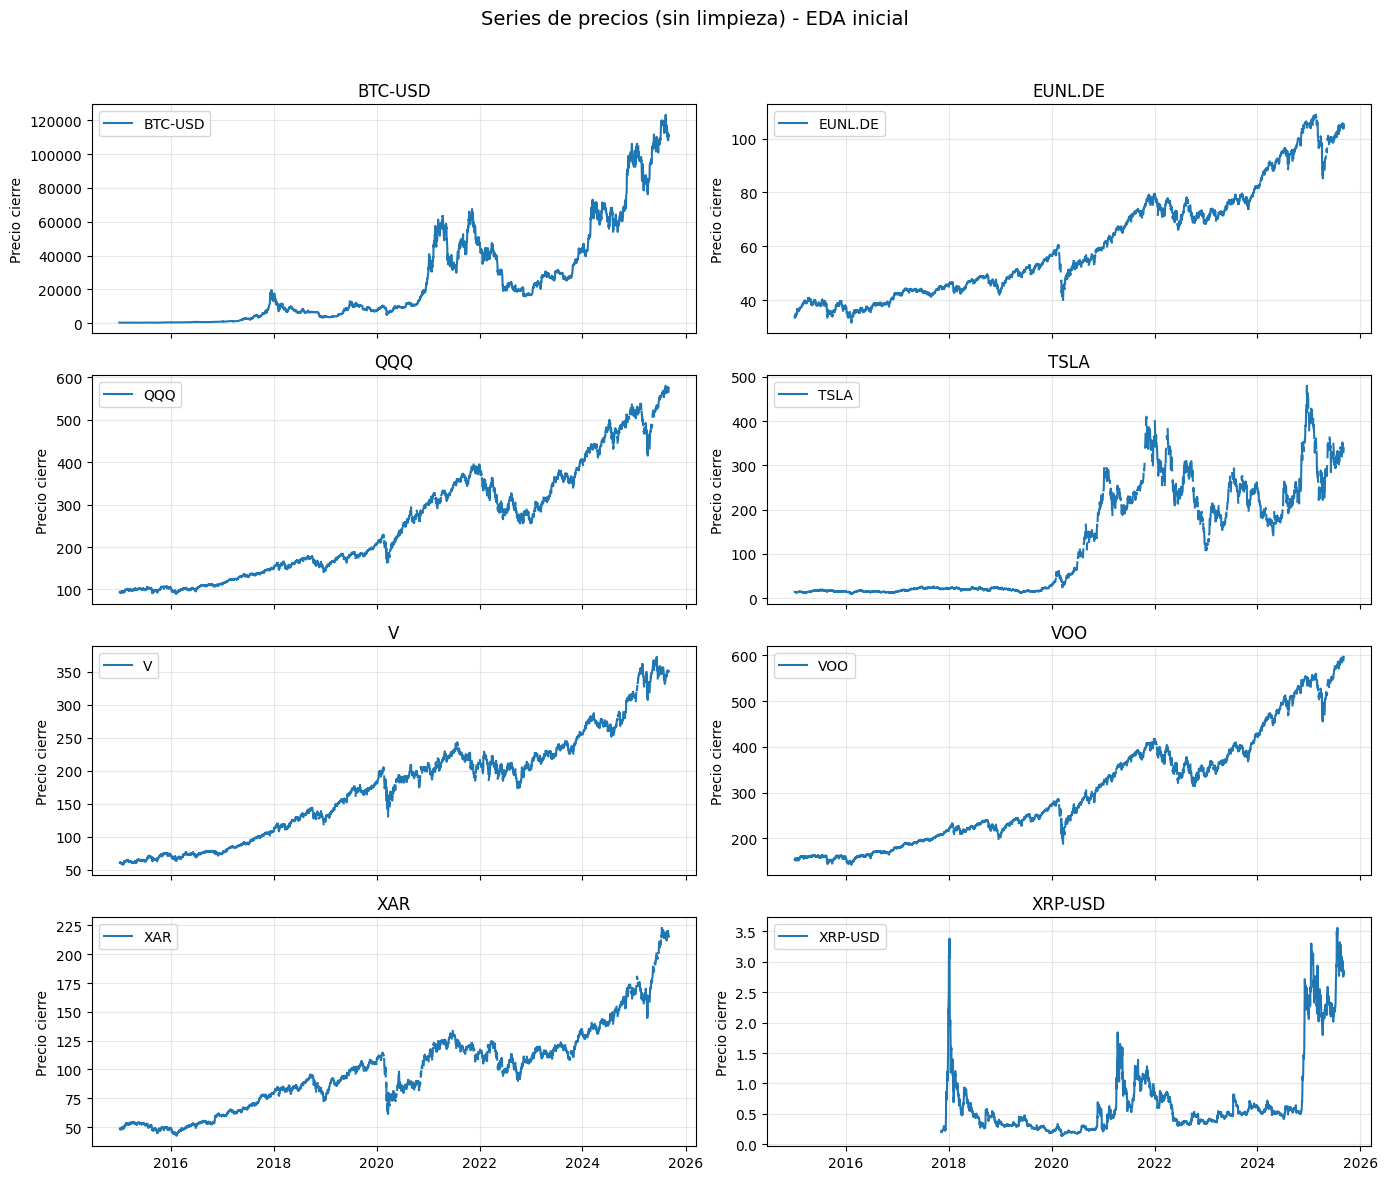

In [ ]:
"""
Visualización inicial con subplots
Objetivo:
- Graficar las series de precios 'close' de TODOS los tickers en un mismo lienzo.
- Cada ticker se muestra en un subplot independiente.
- Permite comparar rápidamente escalas, fechas y comportamiento.
"""

def plot_subplots(df):
    tickers = df["ticker"].unique()
    n = len(tickers)

    # Definimos tamaño de figura (filas dinámicas, 2 columnas)
    ncols = 2
    nrows = (n + 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(14, 3 * nrows), sharex=True)

    # Aplanamos ejes para iterar fácilmente
    axes = axes.flatten()

    for i, tk in enumerate(tickers):
        subset = df[df["ticker"] == tk]
        axes[i].plot(subset["date"], subset["close"], label=tk, color="tab:blue")
        axes[i].set_title(f"{tk}", fontsize=12)
        axes[i].set_ylabel("Precio cierre")
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

    # Quitamos ejes sobrantes si el número de tickers es impar
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Series de precios (sin limpieza) - EDA inicial", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Ejecutar la función
plot_subplots(market_df)


In [ ]:
"""
Análisis preliminar del conjunto piloto (antes de limpieza)

Objetivo:
- Calcular estadísticas básicas por cada ticker:
  • Valor medio (mean)
  • Número de valores nulos (NaN)
  • Desviación estándar (std)
- Generar un mapa de calor (heatmap) de correlación entre tickers.

Notas:
- Este análisis nos permite ver si la limpieza es necesaria para mejorar calidad.
- Criptos tienen más datos (24/7) que equities (solo días hábiles).
- XRP inicia con NaN porque no existen registros históricos completos en la fuente (Yahoo Finance) para esas fechas.
"""
"""
Paso 1 ─ Agrupar por ticker y calcular estadísticas básicas
"""
stats = (
    market_df.groupby("ticker")["close"]
    .agg(
        mean_value="mean",          # promedio
        n_missing=lambda x: x.isna().sum(),  # cantidad de valores nulos
        std_dev="std"              # desviación estándar
    )
    .reset_index()
)

print("Estadísticas preliminares por activo:")
display(stats)

Estadísticas preliminares por activo:


,ticker,mean_value,n_missing,std_dev
0,BTC-USD,25275.675567,0,29303.094403
1,EUNL.DE,60.981730,1184,20.447897
2,QQQ,255.022024,1215,133.588678
3,TSLA,128.394225,1215,121.658539
4,V,174.317495,1215,80.137165
5,VOO,302.214275,1215,120.544892
6,XAR,99.237648,1215,37.231037
7,XRP-USD,0.723592,1042,0.671588


In [ ]:
"""
Paso 2 ─ Preparar datos pivotados para correlación
- Creamos una tabla donde cada columna es un ticker y las filas son fechas.
- Calculamos la matriz de correlación de los precios de cierre.
"""
# Pivotamos a formato ancho: fecha x ticker
pivot_df = market_df.pivot(index="date", columns="ticker", values="close")

# Calculamos matriz de correlación (Pearson por defecto)
corr_matrix = pivot_df.corr(method="pearson")

print("Matriz de correlación:")
display(corr_matrix)

Matriz de correlación:


ticker,BTC-USD,EUNL.DE,QQQ,TSLA,V,VOO,XAR,XRP-USD
ticker,,,,,,,,
BTC-USD,1.000000,0.918950,0.934514,0.833911,0.892665,0.934272,0.926282,0.794702
EUNL.DE,0.918950,1.000000,0.984805,0.886574,0.960024,0.994343,0.944226,0.602229
QQQ,0.934514,0.984805,1.000000,0.897996,0.969605,0.995414,0.950340,0.622997
TSLA,0.833911,0.886574,0.897996,1.000000,0.835899,0.888895,0.805894,0.532642
V,0.892665,0.960024,0.969605,0.835899,1.000000,0.971226,0.965184,0.641974
VOO,0.934272,0.994343,0.995414,0.888895,0.971226,1.000000,0.960950,0.636050
XAR,0.926282,0.944226,0.950340,0.805894,0.965184,0.960950,1.000000,0.745305
XRP-USD,0.794702,0.602229,0.622997,0.532642,0.641974,0.636050,0.745305,1.000000


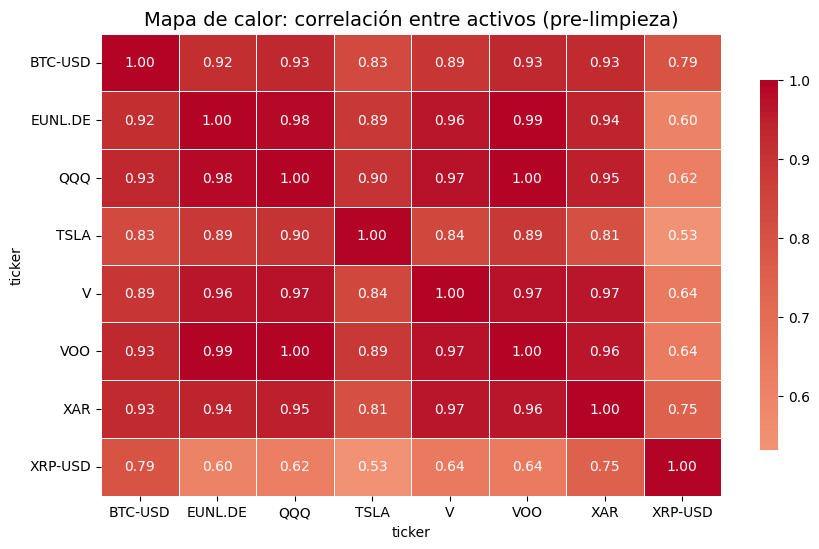

In [ ]:
"""
Paso 3 ─ Visualizar correlación con un heatmap
- Usamos seaborn (sns.heatmap).
- Añadimos anotaciones para interpretar valores fácilmente.
"""
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,        # Mostrar valores dentro de las celdas
    fmt=".2f",         # Formato: 2 decimales
    cmap="coolwarm",   # Escala de color: azul (-) a rojo (+)
    center=0,          # Centrado en 0 (neutral)
    cbar_kws={"shrink": .8},  # Ajuste de tamaño de barra lateral
    linewidths=.5      # Líneas entre celdas
)
plt.title("Mapa de calor: correlación entre activos (pre-limpieza)", fontsize=14)
plt.show()


#A continuacion vamos a realizar toda la limpieza de datos para posteriormente comparar el analisis estadistico antes y despues de la limpieza.

Esta limpieza sera realizada siguiendo un pipeline en especifico. El cual veremos paso a paso a medida que vamos realizando el codigo




In [ ]:
def first_valid_dates_by_ticker(df: pd.DataFrame) -> pd.DataFrame:
    """
    Paso 1 - validamoslas fechas de cada ticker

    Objetivo:
    - Encontrar para cada ticker en el DataFrame:
      • Fecha mínima disponible (first_date).
      • Fecha máxima disponible (last_date).
      • Número total de registros (n_total).
      • Número de valores no nulos en 'close' (n_nonnull).
      • Primera fecha válida (no nula) en 'close' (first_valid_date).
      • Proporción de cobertura de datos válidos (coverage_ratio).

    Parámetros:
    ----------
    df : pd.DataFrame
        Dataset en formato tidy con al menos las columnas:
        ['date', 'ticker', 'close'].
        - 'date' puede estar en datetime64 o string; se normaliza a date.
        - 'ticker' identifica el activo.
        - 'close' es el precio de cierre (puede contener NaN).

    Retorna:
    --------
    pd.DataFrame
        Tabla resumen con columnas:
        ['ticker', 'first_valid_date', 'first_date', 'last_date',
         'n_total', 'n_nonnull', 'coverage_ratio']
        donde:
        - ticker: símbolo del activo.
        - first_valid_date: primera fecha con dato válido en 'close'.
        - first_date: fecha mínima en el dataset.
        - last_date: fecha máxima en el dataset.
        - n_total: número total de filas para el ticker.
        - n_nonnull: número de filas con 'close' no nulo.
        - coverage_ratio: n_nonnull / n_total (proporción de cobertura).

    Notas:
    ------
    • Esta función es útil en el pipeline de normalización de series,
      ya que permite identificar el activo con el inicio más reciente.
    • Ese inicio común servirá para alinear todas las series al mismo rango.
    """

    # Normalizamos el tipo de dato de la columna 'date' a objeto date
    tmp = df.copy()
    tmp["date"] = pd.to_datetime(tmp["date"]).dt.date

    # Agrupamos por ticker y calculamos métricas básicas
    g = tmp.sort_values(["ticker", "date"]).groupby("ticker", as_index=False)
    agg = g.agg(
        first_date=("date", "min"),     # fecha mínima en el dataset
        last_date=("date", "max"),      # fecha máxima en el dataset
        n_total=("close", "size"),      # número total de registros
        n_nonnull=("close", lambda s: s.notna().sum())  # registros no nulos
    )

    # Obtenemos la primera fecha con dato no nulo de 'close' por ticker
    first_valid = (
        tmp[tmp["close"].notna()]
        .sort_values(["ticker", "date"])
        .groupby("ticker", as_index=False)
        .agg(first_valid_date=("date", "min"))
    )

    # Unimos ambos resultados
    out = agg.merge(first_valid, on="ticker", how="left")

    # Calculamos proporción de cobertura
    out["coverage_ratio"] = out["n_nonnull"] / out["n_total"]

    return out[[
        "ticker", "first_valid_date", "first_date", "last_date",
        "n_total", "n_nonnull", "coverage_ratio"
    ]]



In [ ]:
def common_start_date(df: pd.DataFrame, strict: bool = True) -> Tuple[pd.Timestamp, pd.DataFrame]:
    """
    Paso 2 - Determinamos una fecha de inicio comun entre los diferentes tickers
    cogiendo como fecha de incio común la primera fecha con dato válido en 'close'.

    Objetivo:
    ----------
    - A partir de un DataFrame de series financieras, identificar:
      • La primera fecha con dato válido (no nulo) de cada ticker.
      • La fecha de inicio común más reciente (máximo de esas fechas).
    - Esta fecha común se usará como punto de arranque del dataset
      normalizado para garantizar que todos los tickers tengan datos
      desde ese día en adelante.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame en formato tidy con al menos:
        ['date', 'ticker', 'close'].
        - 'date' puede estar en datetime64 o string.
        - 'ticker' identifica el activo.
        - 'close' es el precio de cierre (puede contener NaN).

    strict : bool, opcional (default=True)
        • True  → si algún ticker no tiene datos no nulos en 'close',
                   lanza un ValueError.
        • False → ignora esos tickers (se eliminan de la tabla).

    Retorna:
    --------
    common_start : datetime.date
        Fecha más reciente entre las primeras fechas válidas de todos los tickers.
        Marca el inicio común para normalizar el dataset.

    table : pd.DataFrame
        Tabla resumen generada por `first_valid_dates_by_ticker(df)`,
        con las columnas:
        ['ticker', 'first_valid_date', 'first_date', 'last_date',
         'n_total', 'n_nonnull', 'coverage_ratio'].

    Excepciones:
    ------------
    ValueError
        Si strict=True y existen tickers sin ningún dato no nulo.

    Notas:
    ------
    • Si un ticker no tiene registros válidos, puede excluirse con strict=False.
    • Este paso es crítico para sincronizar series con distintos inicios,
      como ocurre entre acciones/ETFs y criptomonedas.
    """
    table = first_valid_dates_by_ticker(df)

    # Si un ticker no tiene 'first_valid_date' (todo NaN), manejarlo
    if table["first_valid_date"].isna().any():
        missing = table[table["first_valid_date"].isna()]["ticker"].tolist()
        msg = f"Tickers sin datos no nulos: {missing}"
        if strict:
            raise ValueError(msg)
        # En modo no estricto, los excluimos
        table = table.dropna(subset=["first_valid_date"])

    # Fecha de inicio común (la más tardía entre todos los tickers)
    common_start = pd.to_datetime(table["first_valid_date"]).max().date()
    return common_start, table



In [ ]:
def make_business_index(common_start, end_date):
    """
    Paso 3 - Generamos un rango de fechas validas (lunes-viernes)

    Objetivo
    --------
    - Construir un rango de fechas con frecuencia de días hábiles
      (business days) entre una fecha de inicio común y una fecha de corte.
    - Este índice servirá para reindexar todas las series financieras y
      normalizarlas a un mismo calendario de negociación.

    Parámetros
    ----------
    common_start : str o datetime.date
        Fecha de inicio común, normalmente determinada por el ticker con
        el inicio de datos más reciente. Puede ser string en formato
        'YYYY-MM-DD' o un objeto datetime.date.

    end_date : str o datetime.date
        Fecha de corte fija que marca el final del análisis. Puede ser string
        en formato 'YYYY-MM-DD' o un objeto datetime.date.

    Retorna
    -------
    business_index : numpy.ndarray de tipo date
        Lista de fechas (naive, sin zona horaria) correspondientes a todos los
        días hábiles (lunes–viernes) entre common_start y end_date.

    Notas
    -----
    • Usa la frecuencia 'B' de pandas, que excluye fines de semana automáticamente.
    • No excluye feriados específicos de cada mercado; si se desea ese nivel de
      precisión, se debería usar `CustomBusinessDay` con un calendario bursátil.
    • Este paso permite alinear ETFs/acciones (que no cotizan en fines de semana)
      con criptomonedas, generando una base común de fechas hábiles.
    """
    idx = pd.date_range(start=common_start, end=end_date, freq="B")
    return idx.date



In [ ]:
def reindex_all_to_business(df: pd.DataFrame, business_index) -> pd.DataFrame:
    """
    Paso 4 - Vamos a reindexar todas las series al calendario hábil
    común (lunes–viernes)

    Objetivo
    --------
    - Alinear todos los tickers a un mismo calendario de días hábiles
    (business days), usando el índice común previamente construido.
    - Mantener el dataset en formato "tidy" y reinyectar los metadatos
    por ticker (asset_class y currency) tras el reindexado.

    Entradas
    --------
    df : pd.DataFrame
        DataFrame en formato tidy con columnas mínimas:
        ['date', 'ticker', 'asset_class', 'close', 'currency'].
        • 'date' puede ser datetime64 o date (se normaliza internamente).
        • 'ticker' identifica el activo.
        • 'close' puede contener NaN (especialmente en fines de semana/feriados).

    business_index : iterable de fechas (p. ej., numpy.ndarray / list[date])
        Índice de fechas hábiles (lunes–viernes) generado por `make_business_index`.
        Este calendario será el que usemos para reindexar todas las series.

    Salida
    ------
    pd.DataFrame
        DataFrame tidy reindexado al calendario común, con columnas:
        ['date', 'ticker', 'asset_class', 'close', 'currency'].
        • Las fechas fuera del calendario se eliminan.
        • Las fechas agregadas por el reindexado quedan con NaN en aquellos
          tickers que no operan en esos días (antes de la limpieza final).

    Detalles de implementación
    --------------------------
    1) Normaliza 'date' a objeto date (naive).
    2) Extrae y conserva metadatos únicos por ticker: asset_class, currency.
    3) Convierte el dataset a formato ancho (pivot: filas=fecha, columnas=ticker).
    4) Reindexa el ancho al business_index (frecuencia hábil).
    5) Vuelve a formato tidy (melt) y ordena por ['ticker', 'date'].
    6) Reinyecta los metadatos por ticker (asset_class, currency).

    Notas
    -----
    • Este paso NO elimina NaN: solo armoniza calendarios. La eliminación de
      días con faltantes se hace en el paso posterior (`drop_days_with_any_nan`).
    • Si se requieren feriados específicos por mercado, el business_index debe
      construirse con un calendario bursátil custom (p. ej., `CustomBusinessDay`).
    • Mantener tidy facilita comparaciones y posteriores operaciones de groupby.

    Ejemplo
    -------
    >>> bidx = make_business_index(common_start, "2025-09-08")
    >>> df_b = reindex_all_to_business(market_df, bidx)
    >>> df_b.head()
    """
    # Copia y normalización de fechas
    tmp = df.copy()
    tmp["date"] = pd.to_datetime(tmp["date"]).dt.date

    # Metadatos por ticker (para reinyectar tras pivot/melt)
    meta = (
        tmp.dropna(subset=["ticker"])
           .groupby("ticker", as_index=False)
           .agg(asset_class=("asset_class", "first"),
                currency=("currency", "first"))
           .set_index("ticker")
    )

    # Pivot a formato ancho: filas=fecha, columnas=ticker, valores=close
    wide = tmp.pivot(index="date", columns="ticker", values="close")

    # Reindex al calendario hábil común (puede introducir NaN)
    wide = wide.reindex(business_index)

    # Volver a tidy (formato largo)
    tidy = (
        wide.reset_index()
            .melt(id_vars="index", var_name="ticker", value_name="close")
            .rename(columns={"index": "date"})
            .sort_values(["ticker", "date"])
            .reset_index(drop=True)
    )

    # Reinyectar metadatos por ticker
    tidy["asset_class"] = tidy["ticker"].map(meta["asset_class"])
    tidy["currency"] = tidy["ticker"].map(meta["currency"])

    return tidy[["date", "ticker", "asset_class", "close", "currency"]]



In [ ]:
"""
Paso E ─ Eliminar días con valores nulos en cualquier ticker
- Deja únicamente las fechas donde TODOS los tickers tienen dato válido.
- Resultado: series completamente sincronizadas y comparables.

Salida:
- df_clean (tidy)
"""
def drop_days_with_any_nan(df: pd.DataFrame) -> pd.DataFrame:
    tmp = df.copy()
    tmp["date"] = pd.to_datetime(tmp["date"]).dt.date

    wide = tmp.pivot(index="date", columns="ticker", values="close")
    wide_clean = wide.dropna()  # elimina días con al menos 1 NaN

    tidy = (
        wide_clean.reset_index()
                  .melt(id_vars="date", var_name="ticker", value_name="close")
                  .sort_values(["ticker", "date"])
                  .reset_index(drop=True)
    )

    # Reinyectar asset_class y currency desde df original
    meta = (
        df.dropna(subset=["ticker"])
          .groupby("ticker", as_index=False)
          .agg(asset_class=("asset_class", "first"),
               currency=("currency", "first"))
          .set_index("ticker")
    )
    tidy["asset_class"] = tidy["ticker"].map(meta["asset_class"])
    tidy["currency"] = tidy["ticker"].map(meta["currency"])
    return tidy[["date", "ticker", "asset_class", "close", "currency"]]


In [ ]:
"""
Paso F ─ Orquestador del pipeline (automático)
- Detecta la fecha de inicio común (ticker con inicio más reciente).
- Construye el calendario hábil.
- Reindexa todas las series a ese calendario.
- Elimina días con nulos.
- Devuelve el DataFrame limpio + metadatos útiles para auditoría.

Parámetros:
- df (tidy)          : dataset original descargado
- end_date (str/date): fecha de corte (ej. '2025-09-08')
- strict (bool)      : si True, lanza error si algún ticker no tiene datos no nulos

Salida:
- df_clean (tidy sincronizado)
- meta (dict) con resúmenes y tablas
"""
def normalize_market_timeseries(
    df: pd.DataFrame,
    end_date,
    strict: bool = True
) -> Tuple[pd.DataFrame, Dict]:
    # 1) Fecha de inicio común
    common_start, table = common_start_date(df, strict=strict)

    # 2) Calendario hábil
    bindex = make_business_index(common_start, end_date)

    # 3) Reindexar al calendario común
    df_b = reindex_all_to_business(df, bindex)

    # 4) Eliminar días con nulos en cualquier ticker
    df_clean = drop_days_with_any_nan(df_b)

    # Métricas de auditoría
    before_counts = (
        df.groupby("ticker")["date"].count().reset_index(name="n_rows_before")
    )
    after_counts = (
        df_clean.groupby("ticker")["date"].count().reset_index(name="n_rows_after")
    )
    coverage_tbl = before_counts.merge(after_counts, on="ticker", how="left")
    coverage_tbl["retained_ratio"] = (
        coverage_tbl["n_rows_after"] / coverage_tbl["n_rows_before"]
    )

    meta = {
        "common_start": common_start,
        "end_date": pd.to_datetime(end_date).date(),
        "first_valid_table": table.sort_values("first_valid_date"),
        "coverage_table": coverage_tbl.sort_values("ticker")
    }
    return df_clean, meta


#Comprobamos los resultados de la limpieza

In [ ]:
"""
Ejecutamos el pipeline de normalización y lo mostramos para comprobar los resultados
"""
market_df_clean, meta = normalize_market_timeseries(market_df, END_DATE, strict=True)
display(market_df_clean)


,date,ticker,asset_class,close,currency
0,2017-11-09,BTC-USD,Crypto,7143.580078,USD
1,2017-11-10,BTC-USD,Crypto,6618.140137,USD
2,2017-11-13,BTC-USD,Crypto,6559.490234,USD
3,2017-11-14,BTC-USD,Crypto,6635.750000,USD
4,2017-11-15,BTC-USD,Crypto,7315.540039,USD
...,...,...,...,...,...
15443,2025-08-28,XRP-USD,Crypto,2.967095,USD
15444,2025-08-29,XRP-USD,Crypto,2.821957,USD
15445,2025-09-02,XRP-USD,Crypto,2.861859,USD
15446,2025-09-03,XRP-USD,Crypto,2.844895,USD


In [ ]:
"""
Comprobaciones rápidas (sanity checks)
- Cobertura temporal por ticker (mínima y máxima fecha despues de la limpieza).
- Conteo de registros por activo.
"""
checks = (
    market_df_clean
    .groupby("ticker")
    .agg(first_date=("date", "min"), last_date=("date", "max"), n_rows=("date", "count"))
    .sort_index()
)
display(checks)


,first_date,last_date,n_rows
ticker,,,
BTC-USD,2017-11-09,2025-09-04,1931
EUNL.DE,2017-11-09,2025-09-04,1931
QQQ,2017-11-09,2025-09-04,1931
TSLA,2017-11-09,2025-09-04,1931
V,2017-11-09,2025-09-04,1931
VOO,2017-11-09,2025-09-04,1931
XAR,2017-11-09,2025-09-04,1931
XRP-USD,2017-11-09,2025-09-04,1931


In [ ]:
"""
Agrupación en base al ticker (para visualización)
"""
for ticker, group in market_df_clean.groupby('ticker'):
    print(f"Ticker: {ticker}")
    print(group.head(10))
    print("\n" + "="*50 + "\n") # Separador para una mejor visualización

Ticker: BTC-USD
         date   ticker asset_class        close currency
0  2017-11-09  BTC-USD      Crypto  7143.580078      USD
1  2017-11-10  BTC-USD      Crypto  6618.140137      USD
2  2017-11-13  BTC-USD      Crypto  6559.490234      USD
3  2017-11-14  BTC-USD      Crypto  6635.750000      USD
4  2017-11-15  BTC-USD      Crypto  7315.540039      USD
5  2017-11-16  BTC-USD      Crypto  7871.689941      USD
6  2017-11-17  BTC-USD      Crypto  7708.990234      USD
7  2017-11-20  BTC-USD      Crypto  8200.639648      USD
8  2017-11-21  BTC-USD      Crypto  8071.259766      USD
9  2017-11-22  BTC-USD      Crypto  8253.549805      USD


Ticker: EUNL.DE
            date   ticker asset_class      close currency
1931  2017-11-09  EUNL.DE         ETF  44.970001      EUR
1932  2017-11-10  EUNL.DE         ETF  44.880001      EUR
1933  2017-11-13  EUNL.DE         ETF  44.820000      EUR
1934  2017-11-14  EUNL.DE         ETF  44.310001      EUR
1935  2017-11-15  EUNL.DE         ETF  44.080002 

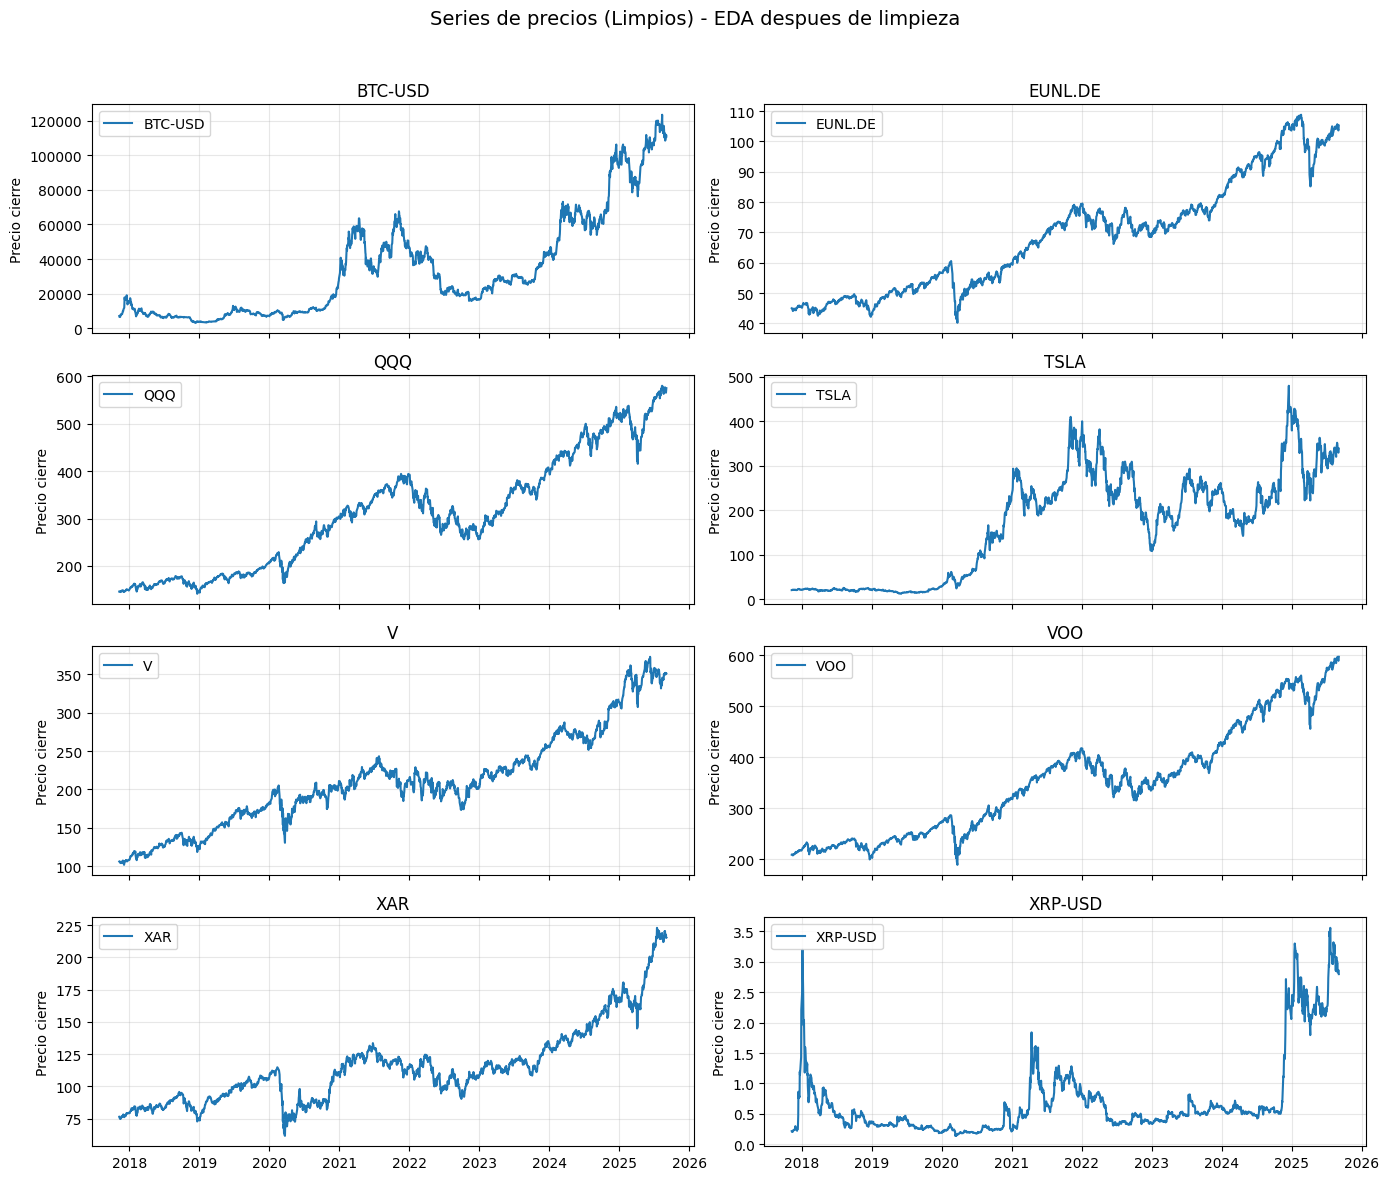

In [ ]:
"""
Visualización con subplots
Objetivo:
- Graficar las series de precios 'close' de TODOS los tickers en un mismo lienzo.
- Cada ticker se muestra en un subplot independiente.
- Permite comparar rápidamente escalas, fechas y comportamiento.
"""

def plot_subplots(df):
    tickers = df["ticker"].unique()
    n = len(tickers)

    # Definimos tamaño de figura (filas dinámicas, 2 columnas)
    ncols = 2
    nrows = (n + 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(14, 3 * nrows), sharex=True)

    # Aplanamos ejes para iterar fácilmente
    axes = axes.flatten()

    for i, tk in enumerate(tickers):
        subset = df[df["ticker"] == tk]
        axes[i].plot(subset["date"], subset["close"], label=tk, color="tab:blue")
        axes[i].set_title(f"{tk}", fontsize=12)
        axes[i].set_ylabel("Precio cierre")
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

    # Quitamos ejes sobrantes si el número de tickers es impar
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Series de precios (Limpios) - EDA despues de limpieza", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Ejecutar la función
plot_subplots(market_df_clean)

In [ ]:
"""
Análisis preliminar del conjunto piloto (antes de limpieza)

Objetivo:
- Calcular estadísticas básicas por cada ticker:
  • Valor medio (mean)
  • Número de valores nulos (NaN)
  • Desviación estándar (std)
- Generar un mapa de calor (heatmap) de correlación entre tickers.

Notas:
- Este análisis nos permite ver si la limpieza es necesaria para mejorar calidad.
- Criptos tienen más datos (24/7) que equities (solo días hábiles).
- XRP inicia con NaN porque no existen registros históricos completos en la fuente (Yahoo Finance) para esas fechas.
"""
"""
Paso 1 ─ Agrupar por ticker y calcular estadísticas básicas
"""
stats = (
    market_df_clean.groupby("ticker")["close"]
    .agg(
        mean_value="mean",          # promedio
        n_missing=lambda x: x.isna().sum(),  # cantidad de valores nulos
        std_dev="std"              # desviación estándar
    )
    .reset_index()
)

print("Estadísticas preliminares por activo:")
display(stats)

Estadísticas preliminares por activo:


,ticker,mean_value,n_missing,std_dev
0,BTC-USD,34100.146852,0,29577.069272
1,EUNL.DE,68.826128,0,18.276842
2,QQQ,308.313973,0,117.672474
3,TSLA,169.809921,0,117.659960
4,V,210.625625,0,61.974767
5,VOO,350.620606,0,105.453342
6,XAR,115.096328,0,30.635449
7,XRP-USD,0.720082,0,0.667903


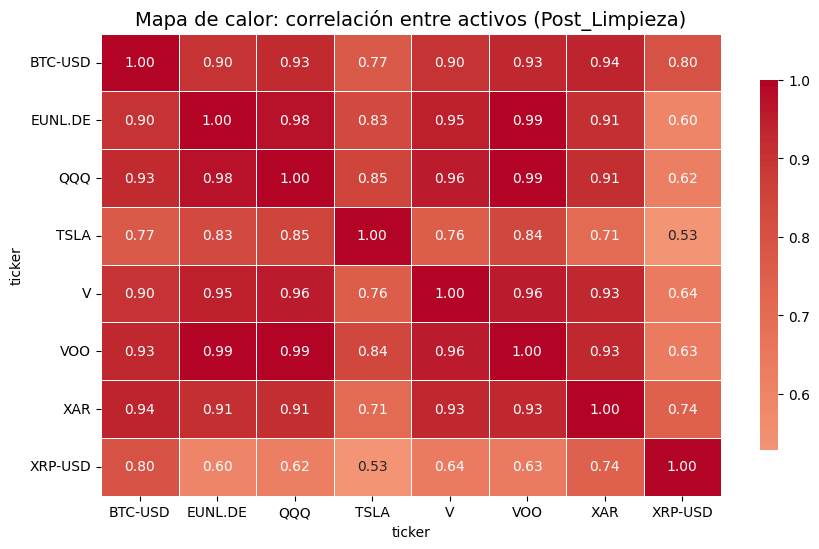

In [ ]:
"""
Visualizar correlación con un heatmap (Dataset limpio)
- Usamos seaborn (sns.heatmap).
- Añadimos anotaciones para interpretar valores fácilmente.
"""
# Pivotamos a formato ancho: fecha x ticker
pivot_df_clean = market_df_clean.pivot(index="date", columns="ticker", values="close")

# Calculamos matriz de correlación (Pearson por defecto)
corr_matrix_c = pivot_df_clean.corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix_c,
    annot=True,        # Mostrar valores dentro de las celdas
    fmt=".2f",         # Formato: 2 decimales
    cmap="coolwarm",   # Escala de color: azul (-) a rojo (+)
    center=0,          # Centrado en 0 (neutral)
    cbar_kws={"shrink": .8},  # Ajuste de tamaño de barra lateral
    linewidths=.5      # Líneas entre celdas
)
plt.title("Mapa de calor: correlación entre activos (Post_Limpieza)", fontsize=14)
plt.show()